# Предварительная Настройка

In [2]:
import os, shutil
if os.path.exists('DNN'):
    shutil.rmtree("DNN")
!git clone https://github.com/Belashov641618/DNN.git

!pip install belashovplot
from belashovplot.belashovplot import DefaultFont, DefaultBigHeader, DefaultHeader, DefaultDefault, DefaultCaption, DefaultSmallCaption
DefaultFont['font'] = 'DejaVu Sans'
for Font in [DefaultBigHeader, DefaultHeader, DefaultDefault, DefaultCaption, DefaultSmallCaption]:
  Font.Font = 'DejaVu Sans'

Cloning into 'DNN'...
remote: Enumerating objects: 844, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 844 (delta 98), reused 92 (delta 48), pack-reused 666
Receiving objects: 100% (844/844), 37.61 MiB | 37.29 MiB/s, done.
Resolving deltas: 100% (453/453), done.
  Preparing metadata (setup.py) ... done
  Created wheel for belashovplot: filename=belashovplot-1.0-py3-none-any.whl size=12758 sha256=932bae32795d7ff764215180035abb6ebc34be2615b714ec9d575c1f0d84c1c7
  Stored in directory: /root/.cache/pip/wheels/55/7b/e2/e5bf08c4c48d0989afbcb220497fa4bb6805a32f6c7826eece
Successfully built belashovplot


In [3]:
import DNN

from DNN.src.modules import layers
from DNN.src.modules import models
from DNN.src import utilities

from DNN.src.utilities import Format, CycleTimePredictor
from DNN.src.utilities.UniversalTestsAndOther import GenerateSingleUnscaledSampleMNIST

import torch
import torchvision
from torchvision.transforms.functional import resize, pad
from torchvision.transforms import InterpolationMode
import numpy
import scipy
from itertools import product
from belashovplot import TiledPlot
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Проверка распределения случайного шума

In [4]:
from DNN.src.modules.wrappers.incoherent.noises.fouriers import gaussian
torch.cuda.empty_cache()

N = 512

sigmas = (0.05, 0.2, 0.2)
counts = (N, N, N)
limits = ((0, 1), (0, 1), (0, 1))

generator = gaussian(sigmas, counts, limits, generator=True)

NameError: name 'length' is not defined

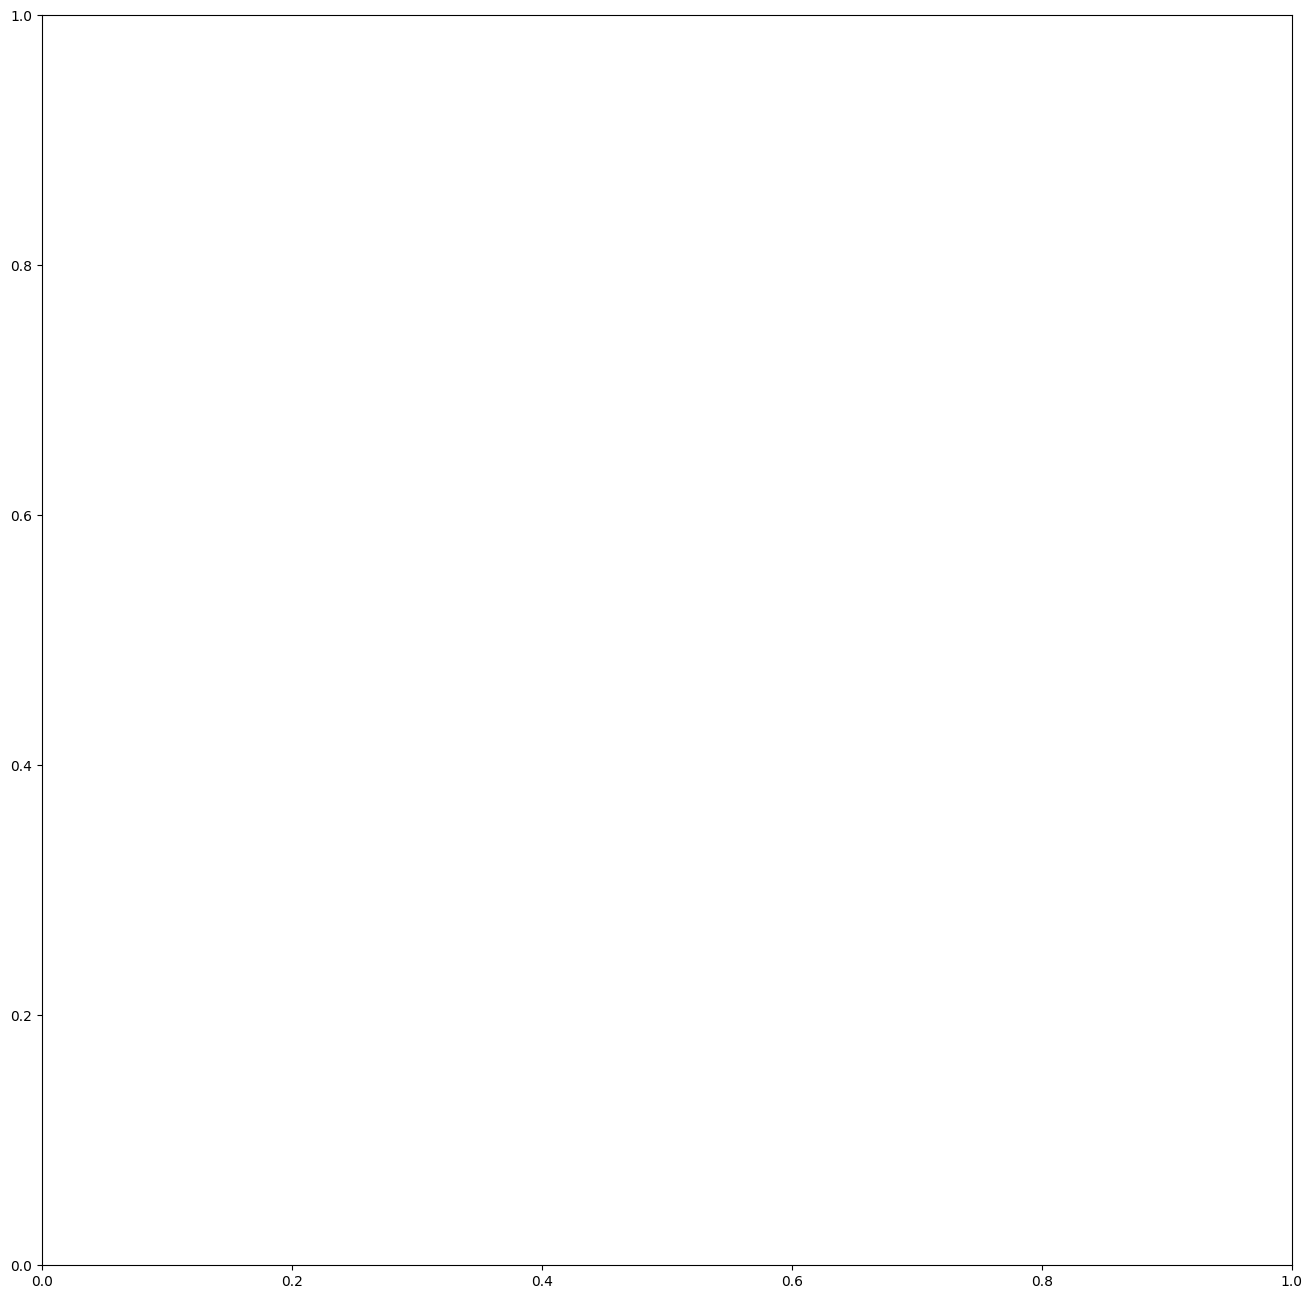

In [5]:
with torch.no_grad():
    data = generator.sample()

    cols, rows = 5, 3
    total = int(rows * cols)
    indexes = numpy.linspace(0, N-1, total).astype(int)

    plot = TiledPlot(16, 9)

    kwargs = {'aspect':'auto', 'cmap':'viridis', 'extent':[0, length]*2}
    for (col, row), index in zip(product(range(cols), range(rows)), indexes):
        axes = plot.axes.add(col, row)
        axes.imshow(data[index].cpu(), **kwargs)

    plot.show()